Layer (type:depth-idx)                   Output Shape              Param #
B13NetV2                                 [5, 3]                    --
├─Flatten: 1-1                           [5, 256, 2, 16, 16]       --
├─Flatten: 1-2                           [5, 256, 2, 16, 16]       --
├─Sequential: 1-3                        [5, 512, 1, 16, 16]       --
│    └─Conv3d: 2-1                       [5, 512, 2, 16, 16]       1,180,160
│    └─ReLU: 2-2                         [5, 512, 2, 16, 16]       --
│    └─Conv3d: 2-3                       [5, 512, 1, 16, 16]       4,719,104
│    └─ReLU: 2-4                         [5, 512, 1, 16, 16]       --
├─Sequential: 1-4                        [5, 512, 1, 16, 16]       (recursive)
│    └─Conv3d: 2-5                       [5, 512, 2, 16, 16]       (recursive)
│    └─ReLU: 2-6                         [5, 512, 2, 16, 16]       --
│    └─Conv3d: 2-7                       [5, 512, 1, 16, 16]       (recursive)
│    └─ReLU: 2-8                         [5,

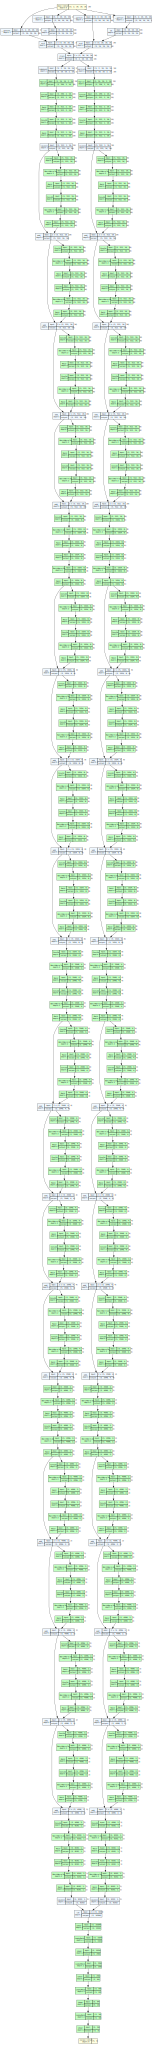

In [2]:
import torch
from model_b import B13NetV2
from torchinfo import summary
from torchview import draw_graph

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


model = B13NetV2(output_size=3, depth=16, complex_mode="OrignalComplexStack").to(device)

model_size = (5, 2, 16, 16, 16, 16)
print(summary(model, input_size=model_size))
model_graph = draw_graph(model, input_size=model_size, device=device)
model_graph.visual_graph

